**Empowering Rehabilitation Researchers through Data Science, Reproducibility, and Data Visualization: Data Management and Quality Control**

APTA Combined Sections Meeting, February 2025

This code provides an example of how to use data visualization for data inspection and quality control. The data we are working with is from an individual with stroke who wore bilateral wrist sensors for 24 hours. Data were exported in 1-second epochs expressed in ActiGraph activity counts and 30-second epochs expressed in gravitational units. Executing this script requires five files:
  

*   L_1Hz.csv  [1Hz data from the left sensor]
*   R_1Hz.csv  [1Hz data from the right sensor]

*   L_30Hz.csv  [30Hz data from the left sensor]
*   R_30Hz.csv  [30Hz data from the right sensor]

*   ReferentData.csv






  
  
  

First, load the R packages required:

In [39]:
install.packages(c("tidyverse", "svDialogs", "signal"))

library("tidyverse")
library("svDialogs")
library("signal")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Next, read in the data files from each sensor

In [44]:
L_1Hz <- read.csv('/L_1Hz.csv')
R_1Hz <- read.csv('/R_1Hz.csv')
L_30Hz <- read.csv('/L_30Hz.csv')
R_30Hz <- read.csv('/R_30Hz.csv')

Preview data files so we know what the data files look like:

In [45]:
head(L_1Hz)
head(R_1Hz)
head(L_30Hz)
head(R_30Hz)

,TIME,X,Y,Z
,<chr>,<int>,<int>,<int>
1,8/17/2023 13:00,0,0,0
2,8/17/2023 13:00,0,0,0
3,8/17/2023 13:00,0,0,0
4,8/17/2023 13:00,0,0,0
5,8/17/2023 13:00,0,0,0
6,8/17/2023 13:00,0,0,0


,TIME,X,Y,Z
,<chr>,<int>,<int>,<int>
1,8/17/2023 13:00,0,0,0
2,8/17/2023 13:00,0,0,0
3,8/17/2023 13:00,0,0,0
4,8/17/2023 13:00,0,0,0
5,8/17/2023 13:00,0,0,0
6,8/17/2023 13:00,0,0,0


,TIME,X,Y,Z
,<chr>,<dbl>,<dbl>,<dbl>
1,8/17/2023 13:00,-0.051,-0.047,-0.957
2,8/17/2023 13:00,-0.020,-0.055,-0.953
3,8/17/2023 13:00,-0.023,-0.051,-0.953
4,8/17/2023 13:00,-0.016,-0.051,-0.949
5,8/17/2023 13:00,-0.023,-0.051,-0.953
6,8/17/2023 13:00,-0.020,-0.051,-0.953


,TIME,X,Y,Z
,<chr>,<dbl>,<dbl>,<dbl>
1,8/17/2023 13:00,0.020,-0.020,-0.980
2,8/17/2023 13:00,0.043,-0.035,-0.973
3,8/17/2023 13:00,0.047,-0.035,-0.965
4,8/17/2023 13:00,0.055,-0.027,-0.969
5,8/17/2023 13:00,0.051,-0.027,-0.969
6,8/17/2023 13:00,0.055,-0.027,-0.965


Calculate the vector magnitude for the 1Hz and 30Hz data for each side (left/right)

In [46]:
L_1Hz$LVM <- sqrt(L_1Hz$X^2 + L_1Hz$Y^2 + L_1Hz$Z^2)
R_1Hz$RVM <- sqrt(R_1Hz$X^2 + R_1Hz$Y^2 + R_1Hz$Z^2)

L_30Hz$LVM <-sqrt(L_30Hz$X^2 + L_30Hz$Y^2 + L_30Hz$Z^2 )
R_30Hz$RVM <-sqrt(R_30Hz$X^2 + R_30Hz$Y^2 + R_30Hz$Z^2 )


Filtering the 30 Hz data:

In [47]:
bf <- butter(2, c(I(.2/15),I(12/15)), type="pass")
L_30Hz$LVM<- filtfilt(x=L_30Hz$LVM, filt = bf)
R_30Hz$RVM<- filtfilt(x=R_30Hz$RVM, filt = bf)

Merging data from the left and right sensor into one data frame to make things easier:

In [48]:
AccelData_1Hz <- data.frame(L_1Hz, RVMData = R_1Hz$RVM)
head(AccelData_1Hz)

AccelData_30Hz <- data.frame(L_30Hz, RVM = R_30Hz$RVM)
head(AccelData_30Hz)

,TIME,X,Y,Z,LVM,RVMData
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,8/17/2023 13:00,0,0,0,0,0
2,8/17/2023 13:00,0,0,0,0,0
3,8/17/2023 13:00,0,0,0,0,0
4,8/17/2023 13:00,0,0,0,0,0
5,8/17/2023 13:00,0,0,0,0,0
6,8/17/2023 13:00,0,0,0,0,0


,TIME,X,Y,Z,LVM,RVM
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8/17/2023 13:00,-0.051,-0.047,-0.957,0.3721961,0.3842429
2,8/17/2023 13:00,-0.020,-0.055,-0.953,0.5372063,0.5494762
3,8/17/2023 13:00,-0.023,-0.051,-0.953,0.3923176,0.3969026
4,8/17/2023 13:00,-0.016,-0.051,-0.949,0.4481666,0.4596072
5,8/17/2023 13:00,-0.023,-0.051,-0.953,0.4076380,0.4157603
6,8/17/2023 13:00,-0.020,-0.051,-0.953,0.3991257,0.4026779


Find count values that exceed threshold (>/= 2). Values that exceed this threshold are considered time when the upper limb is moving.

In [49]:
Threshold <- 2
LCount <- which(AccelData_1Hz$LVM >= Threshold)
RCount <- which(AccelData_1Hz$RVM >= Threshold)

Calculate wear time, LTime (time in which left upper limb is moving), and RTime (time in which right upper limb is moving)

In [50]:
WearTime <- round((nrow(AccelData_1Hz)/60), 0) #Wearing times in minutes, as integer
WearTime
LTime <- ((length(LCount)/60/WearTime))
RTime <- ((length(RCount)/60/WearTime))
LTime
RTime

[1] 1440

[1] 0.04153935

[1] 0.2785301

Enter the participant's affected side. The participant's affected side is the right ("R"), so we'll enter "R" in the code below. Then, calculate the use ratio as the time the affected side is moving divided by the time the unaffected side is moving. Use ratio values in neurotypical individuals tend to be ~1, indicating approximately equal use of the left and right upper limbs. Use ratio values tend to be lower in individuals with an affected upper limb (e.g., after stroke), indicating less use of the affected upper limb compared to the unaffected upper limb.

In [51]:
#Enter the participant's affected side (either "R" or "L")
AffSide <- as.character("R")

if (AffSide == "L") {
 UseRatio <- round(LTime/RTime, 3)
} else {
 UseRatio <- round(RTime/LTime, 3)
}

print(UseRatio)

[1] 6.705


This is a really high use ratio value. Let's plot the accelerations from the 30Hz data file over time to take a closer look. In the plot, data from the left sensor are shown in red, and data from the right sensor are shown in black.

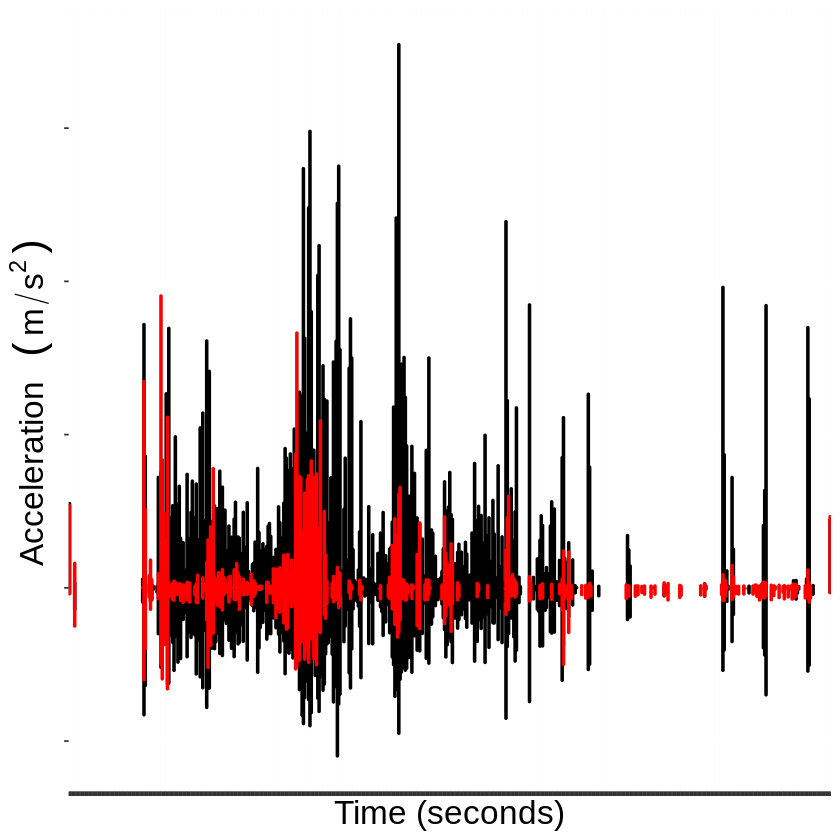

In [52]:
ylabel <- expression(Acceleration ~ (m/s^2))

ggplot(data = AccelData_30Hz, aes(x = TIME)) + geom_line(aes(y = RVM), linewidth = 1, colour = "black") +
  ylab(ylabel) + xlab("Time (seconds)") + theme(panel.grid.minor = element_blank()) +
  geom_line(aes(y = LVM), linewidth = 1, colour = "red") +
  theme(axis.text = element_blank(), axis.title.y = element_text(size = 20),
        axis.title.x = element_text(size = 20))

The plot shows greater accelerations on the right sensor (shown in black) and lower accelerations on the left sensor (shown in red). This is odd, because the participant's affected side is the right side, so we would expect lower (not greater) accelerations on the affected right side. What could have happened? Let's try another form of visualization to see if we can figure it out.

Let's plot this participant's use ratio value (6.705) compared to the use ratio of other participant data that have been processed. To do this, we'll read in a data file called 'ReferentData.csv' that contains use ratio values from other participants with stroke.

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


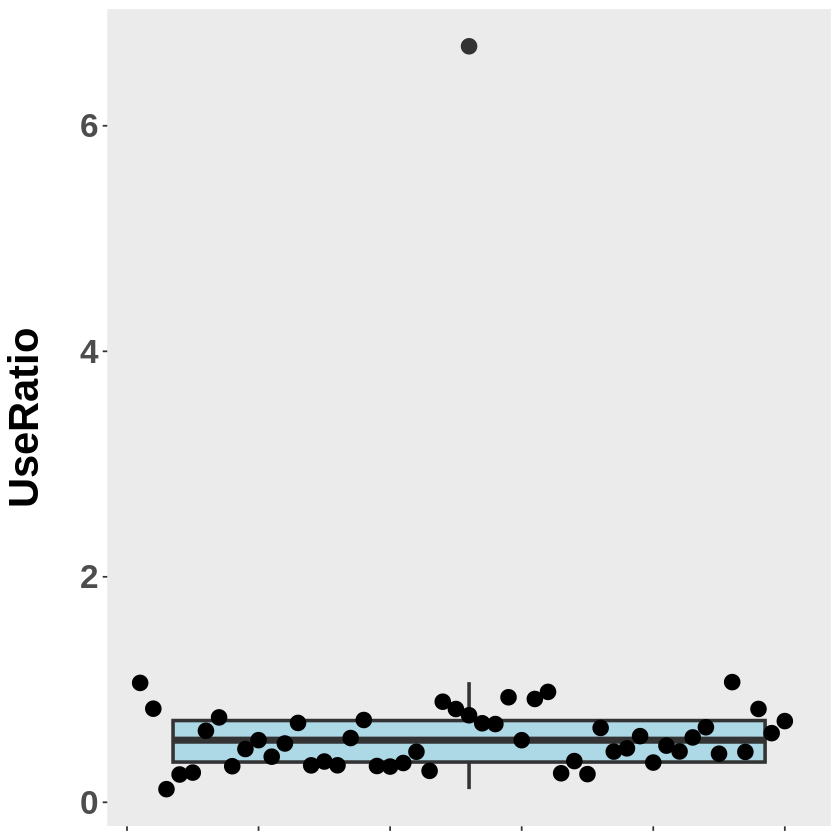

In [53]:
HarmonizedData <- read.csv('/ReferentData.csv')

FigureData <- HarmonizedData %>% select(SubIDName, TimePoint, Day, use_ratio)

FigureData <- FigureData %>% dplyr::filter(TimePoint == "baseline")

FigureData <- FigureData %>% group_by(SubIDName) %>%
  summarise(UseRatio = mean(use_ratio))
FigureData$ID <- 1:length(FigureData$SubIDName)
FigureData$DataSource <- rep("Ref")
FigureData[51, 4] <- "Processed Data Point"

ggplot(data = FigureData, aes(x = ID, y = UseRatio)) + geom_boxplot(fill = "lightblue", outlier.size =4,
       lwd = 1) +
  geom_point(aes(x = ID), size = 4, subset(FigureData, UseRatio <2)) + theme(panel.grid.minor = element_blank(),
  panel.grid.major = element_blank(), axis.title.x = element_blank(),
  axis.text.x = element_blank(), axis.title.y = element_text(size = 25, face = "bold",
                                                             margin = margin(t = 0, r = 20, b = 0, l = 0)),
  axis.text.y = element_text(size = 20, face = "bold")) +
  geom_text(data = FigureData %>% dplyr::filter(DataSource == "Processed Data Point"),
                                 aes(ID, UseRatio, label = DataSource), hjust = 3, size = 8)

This participant's use ratio value is much higher than the use ratio values of other participants. This could happen if the participant wore the sensors on the wrong sides (i.e., the left sensor was worn on the right wrist and vice-versa) or if the data files were labeled incorrectly (i.e., data from the left sensor was labeled as data from the right sensor and vice-versa). Visualizing the data helped us catch this and avoid a potential error in our analyses!